In [1]:
import sfq_sim.sfq_core as sfq
import matplotlib.pyplot as plt
import numpy as np
import time
from qutip import basis

In [2]:
fluxonium = sfq.create_qutrit(0.5,1.5)

In [3]:
psi_0 = basis(3,0)

fluxonium.set_qutrit_state(psi_0)

fluxonium.apply_qutrit_sfq_Rygate(10,np.pi,t_delay = 0.5/5e8)



10.0%. Run time:   3.79s. Est. time left: 00:00:00:34
20.0%. Run time:   7.86s. Est. time left: 00:00:00:31
30.0%. Run time:  11.64s. Est. time left: 00:00:00:27
40.0%. Run time:  15.42s. Est. time left: 00:00:00:23
50.0%. Run time:  18.69s. Est. time left: 00:00:00:18
60.0%. Run time:  21.78s. Est. time left: 00:00:00:14
70.0%. Run time:  25.36s. Est. time left: 00:00:00:10
80.0%. Run time:  28.66s. Est. time left: 00:00:00:07
90.0%. Run time:  32.91s. Est. time left: 00:00:00:03
100.0%. Run time:  36.11s. Est. time left: 00:00:00:00
Total run time:  36.12s


In [4]:
final_state = fluxonium.result["psi"][-1]

final_state

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.0032609 -0.00082005j]
 [ 0.9938061 +0.00217066j]
 [-0.11105571-0.0001973j ]]

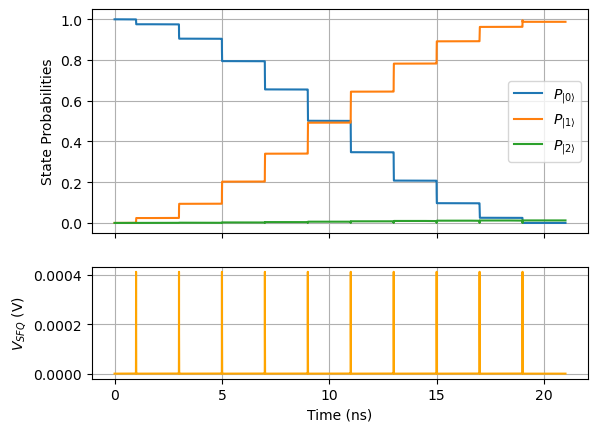

In [5]:
plot = fluxonium.plot_probs(include_pulse=True)

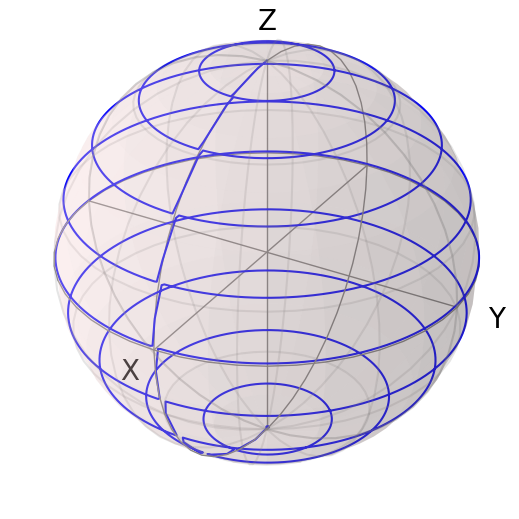

In [7]:
bloch = fluxonium.plot_bloch(n_points=5000)

In [5]:
start_time = time.time()
fluxonium.anharm_sweep(np.arange(1.5,3,0.25),10,np.pi,sweep_progress=True, multicore=0)
finish_time = time.time()
print("Time to complete sweep: ", finish_time-start_time)

Anharmonicity Sweep Progress: 100%|██████████| 6/6 [01:44<00:00, 17.36s/it]

Time to complete sweep:  104.2441143989563


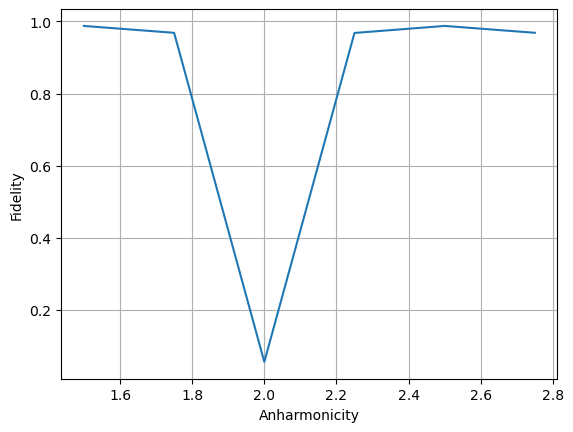

In [6]:
plot2 = fluxonium.plot_anharm_sweep_results()

In [7]:
start_time = time.time()
fluxonium.anharm_sweep(np.arange(1.5,3,0.25),10,np.pi,sweep_progress=True, multicore=6)
finish_time = time.time()
print("Time to complete sweep: ", finish_time-start_time)

100%|██████████| 6/6 [01:02<00:00, 10.33s/it]

Time to complete sweep:  62.22224426269531
